#**Predicting Wildfires In The United States**
Wildfires seem to be a growing phenomenon in the United States. Ever year we hear about fires ravaging California, Oregon and about the huge costs related to fighting these fires. 
The goal of this notebood will be to train a model that can determine the potential fire size class of a fire based off of certain metrics. I believe that with a functional model, firefighters will be better at predicting the potential sizes of a wildfire and plan accordingly when it comes to suppression.

###Importing packages

In [ ]:
!pip install nltk
!pip install newspaper3k

     |████████████████████████████████| 215kB 19.0MB/s 
     |████████████████████████████████| 7.4MB 20.7MB/s 
     |████████████████████████████████| 81kB 11.6MB/s 
     |████████████████████████████████| 92kB 11.9MB/s 
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp37-none-any.whl size=3358 sha256=08c4dbfdf2f474fde57ce6ea26afbbe9fa424d1f4fef3c64f2be07b3e34ea10e
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp37-none-any.whl size=13538 sha256=792cea221cf78ff5a6d426ab208d0260d10dd4a271b854f02a97bcac9e15107e
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp37-none-any.whl size=7398406 sha256=5e52aaa5758395502c4d1405f27f986971bd86d1383a9a02e482128a4c43c4b4
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c

In [ ]:
import nltk
from newspaper import Article
from sklearn import preprocessing
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import sqlite3 as sql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
from bs4 import BeautifulSoup as bs
from matplotlib.pyplot import figure
import bs4
import re
import pandas as pd
import math
import scipy.stats as sc
sns.set()
import statsmodels.api as sm
import math
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.ensemble as ske
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import plotly.express as px
import seaborn as sb
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder


model=LinearRegression(fit_intercept=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
#install the dependencies
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"patrickgg","key":"9c45caf9358f7bbf30870f38a588428d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change the permission
!chmod 600 ~/.kaggle/kaggle.json



In [ ]:
!kaggle datasets download -d rtatman/188-million-us-wildfires

 96% 162M/168M [00:00<00:00, 171MB/s]
100% 168M/168M [00:00<00:00, 203MB/s]


#Cost Of WildFire Management
Let's see if the cost of wildfire suppression has increased over the years. I was able to scrape data from the National Interagency Fire Center to find the costs per year for fire supression costs.

###Uploading the data

In [ ]:
url='https://www.nifc.gov/fire-information/statistics/suppression-costs'
web=requests.get(url, verify=False).text
soup=bs(web,'lxml')
table=soup.find("table")
table_data=table.tbody.find_all("tr")

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning:

Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings



In [ ]:
dictionary={}

for i in range(len(table_data)):
  try:
    key=table_data[i].find_all("a")[0].string
  except:
    key=table_data[i].find_all("td")[0].string
  values=[j.string for j in table_data[i].find_all('td')]

  dictionary[key]=values

column_names=['Year','Fires','Acres','Forest Services','DOI AGENCIES','Total']
key_to_remove = "\xa0"

dictionary.pop(key_to_remove)
df=pd.DataFrame(dictionary).iloc[1:,:].T.iloc[:,:6]
column_names=['Fires','Acres','Forest Services','DOI AGENCIES','Total']
df.columns=column_names

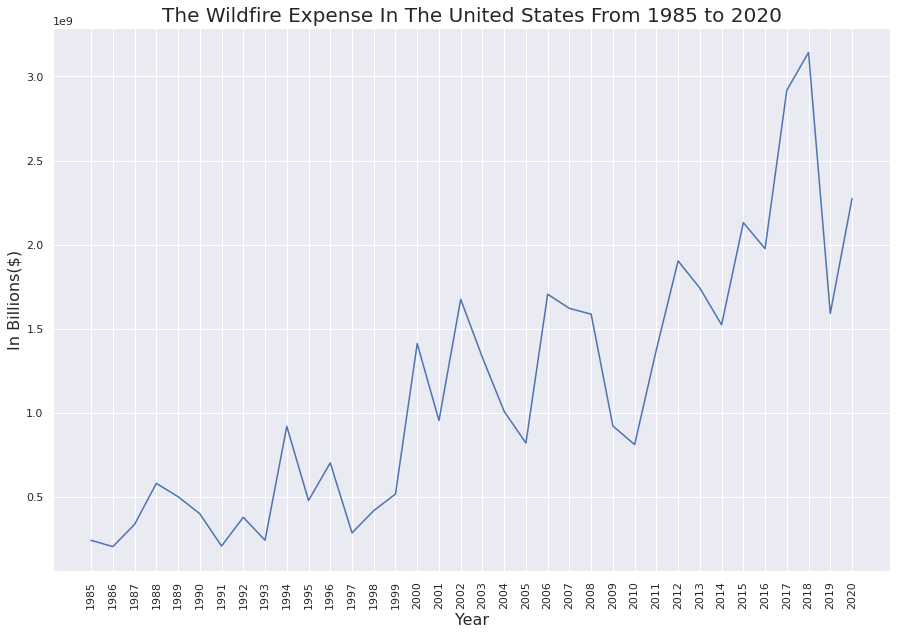

In [ ]:
df['Total'] = df['Total'].str.replace('$', '')
df['Total'] = df['Total'].str.replace(',', '')
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df heade
df1=df.iloc[:,-1]
plt.figure(figsize=(15,10))
df1=pd.to_numeric(df1)
plt.xticks(rotation=90)
plt.title('The Wildfire Expense In The United States From 1985 to 2020',fontsize=20)
plt.ylabel('In Billions($)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.plot(df1)

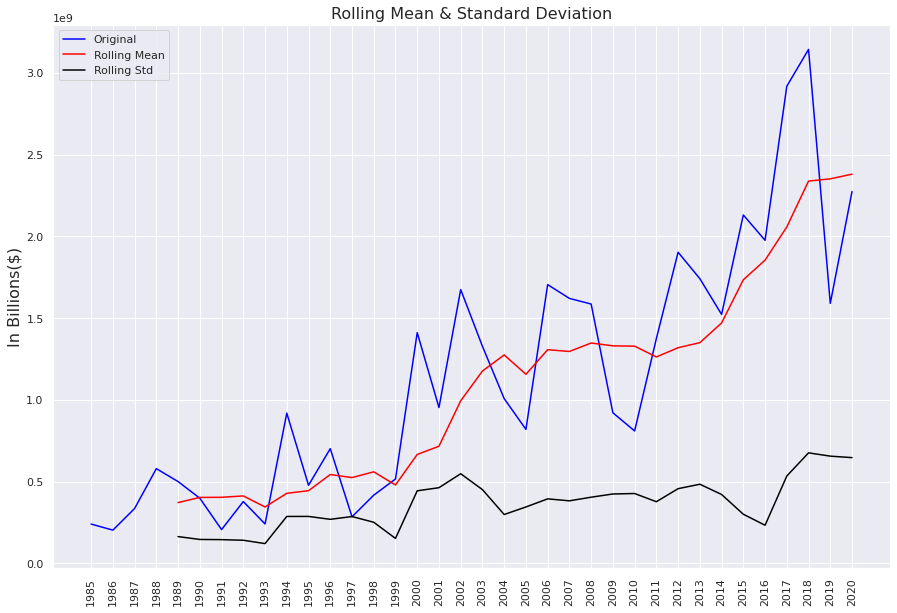

Results of Dickey-Fuller Test:


Test Statistic                  0.099251
p-value                         0.966010
#Lags Used                      6.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=5).mean()
    rolstd = timeseries.rolling(window=5).std()
    #Plot rolling statistics:
    plt.figure(figsize=(15,10))
    plt.ylabel('In Billions($)', fontsize=16)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation',fontsize=16)
    plt.xticks(rotation=90)
    plt.show(block=True)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

test_stationarity(df1)

Since our p-value is higher than 0.05, let's make our data stationary to determine if there has been an increase in suppresion costs.



###Smoothing the data

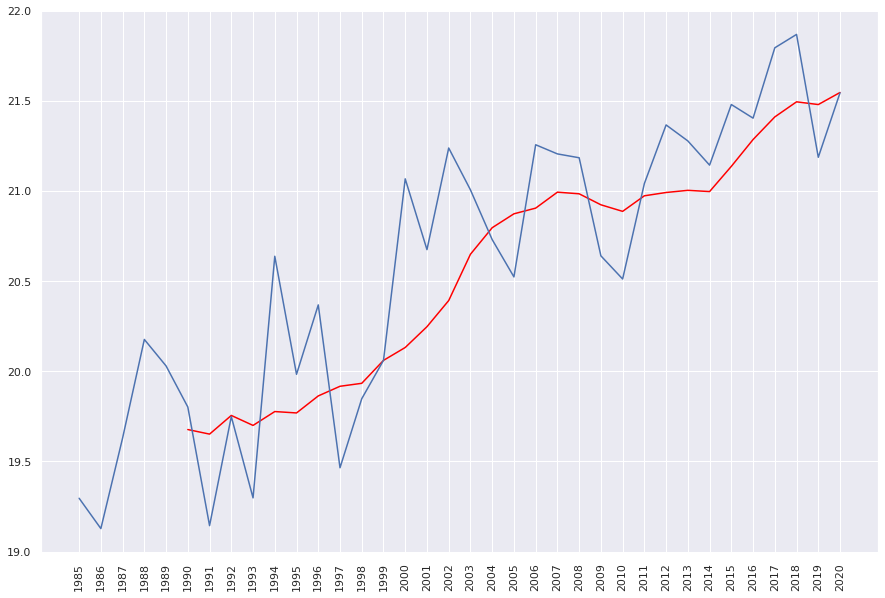

In [ ]:
ts_log = np.log(df1)
ts_smooth = ts_log.rolling(window =6).mean()
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)  
plt.plot(ts_smooth, color = 'red')
plt.plot(ts_log)
plt.show()

In [ ]:
# Case 1: No subtraction
no_sub_ts = ts_smooth
no_sub_ts.dropna(inplace = True)

# Case 2: Yes subtraction
sub_ts = ts_log - ts_smooth
sub_ts.dropna(inplace = True)

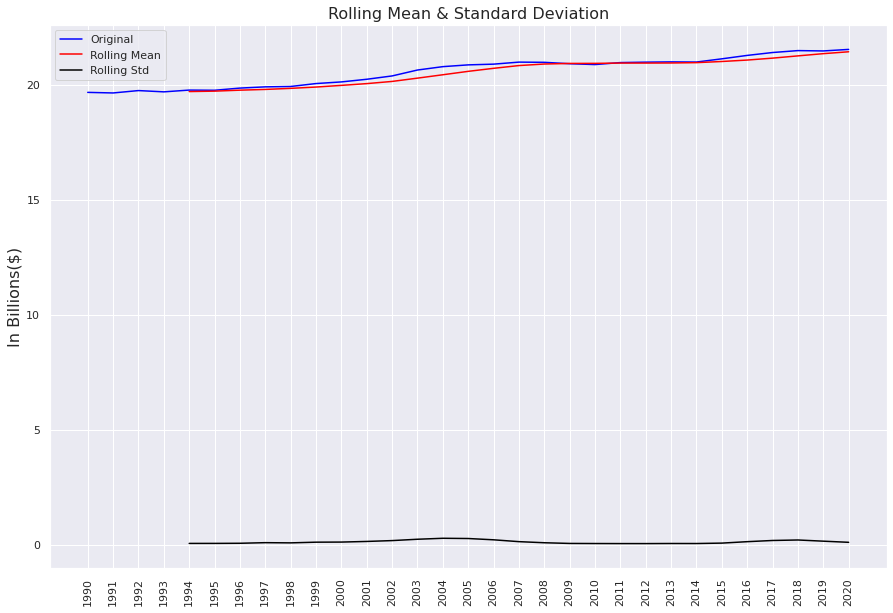

Results of Dickey-Fuller Test:


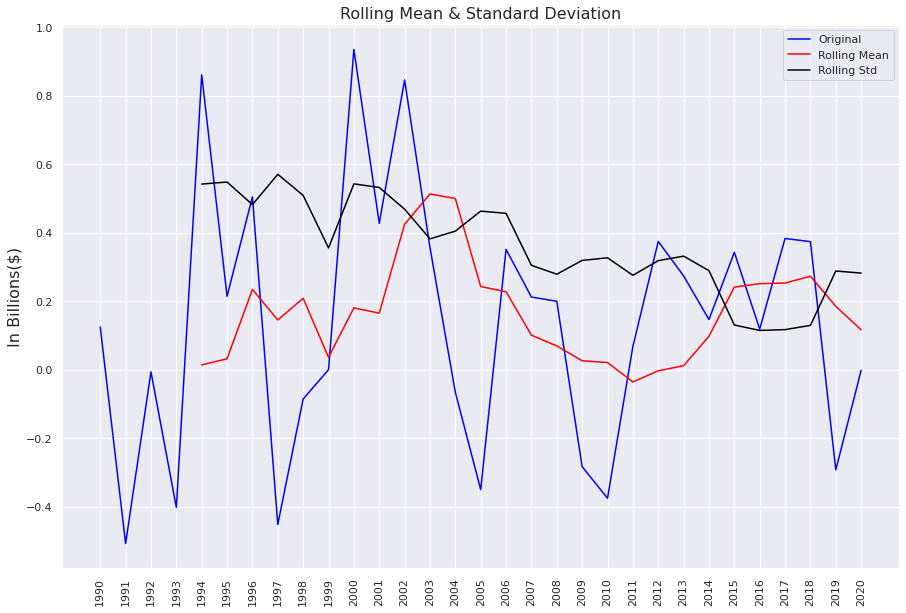

Results of Dickey-Fuller Test:


Test Statistic                 -2.629868
p-value                         0.086980
#Lags Used                      9.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64

In [ ]:
# Perform Dickey-Fuller on both
test_stationarity(no_sub_ts)

test_stationarity(sub_ts)

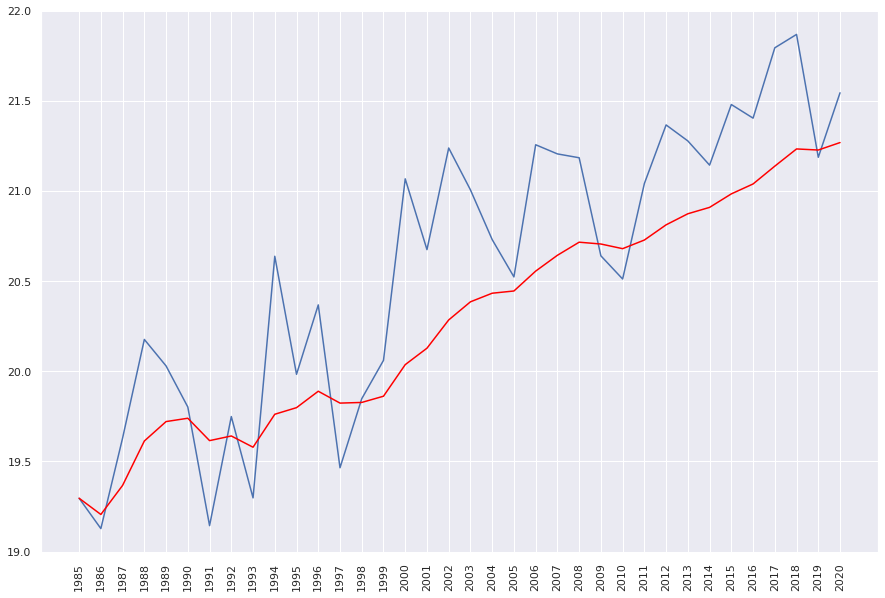

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)  
expwighted_avg = ts_log.ewm(halflife=5).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

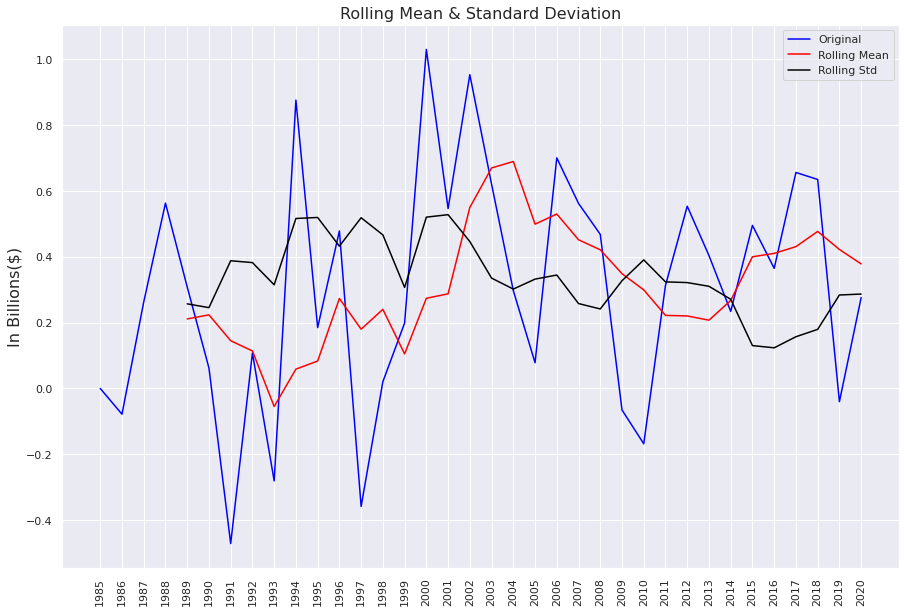

Results of Dickey-Fuller Test:


Test Statistic                 -4.682683
p-value                         0.000091
#Lags Used                      2.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64

In [ ]:

exp_ts_diff = ts_log-expwighted_avg
test_stationarity(exp_ts_diff)

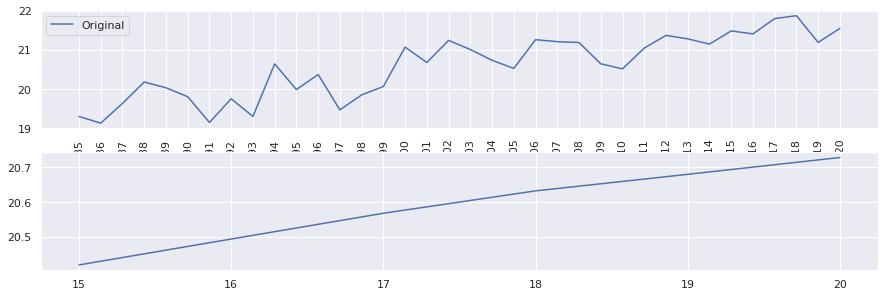

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log.values,freq=30)

trend = decomposition.trend

plt.figure(figsize=(15,10))

 
plt.subplot(411)
plt.xticks(rotation=90)  
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')



We can see that the cost of fire suppression has gone up over the years. With the increasing amount of fires, we can expect these costs to continue to rise. To try and limit errors in which fire fighters misjudge the potential size of a fire, an accurate indicator of potential fire size could help suppress fires more efficiently.

#Relationship Between Fire Factors and Date


###What factors seem to influence forest fires?
We will scrape the Canadian Forest Fire Weather Index (FWI) System to find more information about the factor that have an effect on fire size.

In [ ]:
url="https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi"
article=Article(url)

In [ ]:
article.download()
article.parse()
nltk.download('punkt')
article.nlp()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
print(article.text)

Background Information

Canadian Forest Fire Weather Index (FWI) System

Summary

The Canadian Forest Fire Weather Index (FWI) System consists of six components that account for the effects of fuel moisture and weather conditions on fire behavior.

The first three components are fuel moisture codes, which are numeric ratings of the moisture content of the forest floor and other dead organic matter. Their values rise as the moisture content decreases. There is one fuel moisture code for each of three layers of fuel: litter and other fine fuels; loosely compacted organic layers of moderate depth; and deep, compact organic layers.

The remaining three components are fire behavior indices, which represent the rate of fire spread, the fuel available for combustion, and the frontal fire intensity; these three values rise as the fire danger increases

Structure of the FWI System

The diagram below illustrates the components of the FWI System. Calculation of the components is based on consecut

From this text, we can determine that the Initial Spread Index, Drought Code, Fine Fuel Moisture Code and the temperature seem to have an effect on the size of the fire. Let's determine if the month of the year has a relationship with these factors. I was able to find the following data on the Machine Learning Repository Website.


In [ ]:
FF=pd.read_csv('forestfires.csv')
from sklearn import preprocessing


categorical=[	'month','day']

for feature in categorical:
      le = preprocessing.LabelEncoder()
      FF[feature] = le.fit_transform(FF[feature])
      
FF

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


###Relationship between the month and features

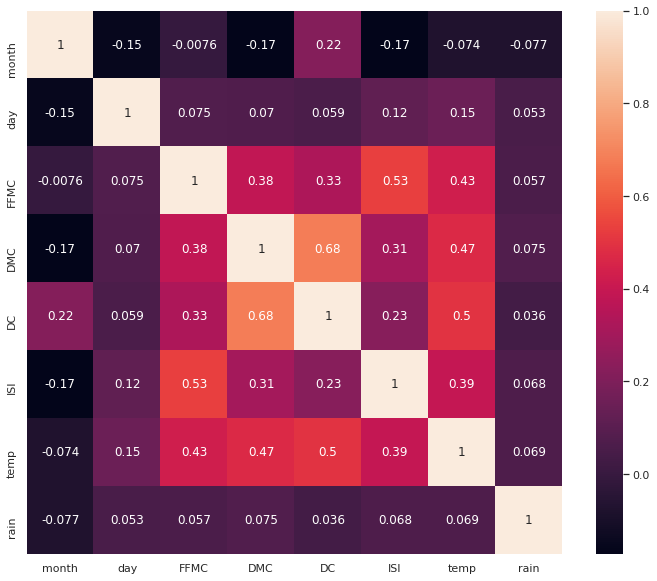

<Figure size 32400x32400 with 0 Axes>

In [ ]:
RF=FF.drop(['RH','wind','area','X','Y'],axis=1)
correlation_mat = RF.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(correlation_mat, annot = True)
plt.figure(figsize=(450,450))
plt.show()

In [ ]:
FF['area']=FF['area'].apply(np.ceil)
DF=FF.drop(['X','Y','day','area'],axis=1)
X=DF.drop(['month'],axis=1)

X=DF
X['temp']=np.square(X['temp'])
Xcritical=X.drop(columns='month')
y=X['month']
y = DF['month'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=150)
sm.OLS(y.astype(float),Xcritical.astype(float)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.750
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                              190.6
Date:                Wed, 28 Apr 2021   Prob (F-statistic):                   9.66e-148
Time:                        02:05:50   Log-Likelihood:                         -1398.2
No. Observations:                 517   AIC:                                      2812.
Df Residuals:                     509   BIC:                                      2846.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FFMC           0.1042      0.010     10.024      0.000       0.084       0.125
DMC           -0.0334      0.004     -9.086      0.000      -0.041      -0.026
DC             0.0115      0.001     12.497      0.000       0.010       0.013
ISI           -0.1320      0.040     -3.271      0.001      -0.211      -0.053
temp          -0.0060      0.001     -5.358      0.000      -0.008      -0.004
RH            -0.0430      0.012     -3.667      0.000      -0.066      -0.020
wind          -0.2063      0.094     -2.205      0.028      -0.390      -0.023
rain          -0.2695      0.552     -0.489      0.625      -1.353       0.814
==============================================================================
Omnibus:                       53.427   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.732
Skew:                          -0.155   Prob(JB):                     0.000141
Kurtosis:                       2.148   Cond. No.                     2.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can determine that the month does have a relationship with the other fire factors. Now let us observe how the wildfire season has varied over the years and varies accross the United States.

#Forest Fire Season Accross the United States

##Upload Dataset and scrub

In [ ]:
from zipfile import ZipFile
file_name="188-million-us-wildfires.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
conn = sql.connect('/content/FPA_FOD_20170508.sqlite')
c=conn.cursor()
df = pd.read_sql('SELECT FIRE_YEAR, 	DISCOVERY_DATE,	STAT_CAUSE_CODE,	STAT_CAUSE_DESCR,FIRE_SIZE,	FIRE_SIZE_CLASS,	LATITUDE,	LONGITUDE,	STATE from fires', con=conn)

In [ ]:
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month_name()
df['DAY_OF_WEEK'] = df['DATE'].dt.day_name()
df1=df.drop(['DISCOVERY_DATE'],axis=1)
df2=df1

In [ ]:
dfgroupedSYM=df2.groupby(['STATE','FIRE_YEAR','MONTH']).agg({'FIRE_SIZE':['sum','mean','count']}).reset_index()
dfgroupedYM=df2.groupby(['FIRE_YEAR','MONTH']).agg({'FIRE_SIZE':['sum','mean','count']}).reset_index()
dfgroupedSM=df2.groupby(['STATE','MONTH']).agg({'FIRE_SIZE':['sum','mean','count']}).reset_index()
dfgroupedSY=df2.groupby(['STATE','FIRE_YEAR']).agg({'FIRE_SIZE':['sum','mean','count']}).reset_index()
dfgroupedSYM.columns=['STATE','FIRE_YEAR','MONTH','FIRE_SIZE_SUM','FIRE_SIZE_MEAN','FIRE_SIZE_COUNT']
dfgroupedSY.columns=['STATE','FIRE_YEAR','FIRE_SIZE_SUM','FIRE_SIZE_MEAN','FIRE_SIZE_COUNT']
dfgroupedYM.columns=['FIRE_YEAR','MONTH','FIRE_SIZE_SUM','FIRE_SIZE_MEAN','FIRE_SIZE_COUNT']
dfgroupedSM.columns=['STATE','MONTH','FIRE_SIZE_SUM','FIRE_SIZE_MEAN','FIRE_SIZE_COUNT']
dfgrouped=dfgroupedSM.drop(['FIRE_SIZE_MEAN','FIRE_SIZE_COUNT'],axis=1)
dfgrouped.nsmallest(5,'FIRE_SIZE_SUM')
dfgrr=dfgroupedSM.drop(['FIRE_SIZE_MEAN','FIRE_SIZE_COUNT'],axis=1)
dfgrr=dfgrr.pivot(index ='MONTH', columns ='STATE')
dfgrr.columns=['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA','HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM','NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN','TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

dfgrr = dfgrr.reindex(new_order, axis=0)
dfgrr.reset_index(level=0, inplace=True)
dfgr=dfgrr.iloc[:,:18]

##Visualizations

###Each States Historical WildFire Season
####Let's see how wildfire season differs per state

In [ ]:
fig = make_subplots(rows=7, cols=8,column_widths=[15,15,15,15,15,15,15,15],row_heights=[7,7,7,7,7,7,7], start_cell="top-left",vertical_spacing=0.07,subplot_titles=('AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL','GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV','NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT','VA', 'VT', 'WA', 'WI', 'WV', 'WY'))

fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.AK),
              row=1, col=1)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.AL),
              row=1, col=2)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.AR),
              row=1, col=3)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.AZ),
              row=1, col=4)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.CA),
              row=1, col=5)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.CO),
              row=1, col=6)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.CT),
              row=1, col=7)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.DC),
              row=1, col=8)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.DE),
              row=2, col=1)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.FL),
              row=2, col=2)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.GA),
              row=2, col=3)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.HI),
              row=2, col=4)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.IA),
              row=2, col=5)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.ID),
              row=2, col=6)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.IL),
              row=2, col=7)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.IN),
              row=2, col=8)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.KS),
              row=3, col=1)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.KY),
              row=3, col=2)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.LA),
              row=3, col=3)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.MA),
              row=3, col=4)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.MD),
              row=3, col=5)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.ME),
              row=3, col=6)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.MI),
              row=3, col=7)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.MN),
              row=3, col=8)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.MO),
              row=4, col=1)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.MS),
              row=4, col=2)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.MT),
              row=4, col=3)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.NC),
              row=4, col=4)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.ND),
              row=4, col=5)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.NE),
              row=4, col=6)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.NH),
              row=4, col=7)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.NJ),
              row=4, col=8)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.NM),
              row=5, col=1)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.NV),
              row=5, col=2)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.NY),
              row=5, col=3)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.OH),
              row=5, col=4)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.OK),
              row=5, col=5)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.OR),
              row=5, col=6)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.PA),
              row=5, col=7)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.PR),
              row=5, col=8)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.RI),
              row=6, col=1)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.SC),
              row=6, col=2)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.SD),
              row=6, col=3)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.TN),
              row=6, col=4)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.TX),
              row=6, col=5)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.UT),
              row=6, col=6)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.VA),
              row=6, col=7)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.VT),
              row=6, col=8)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.WA),
              row=7, col=1)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.WI),
              row=7, col=2)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.WV),
              row=7, col=3)
fig.add_trace(go.Scatter(x=dfgrr.MONTH, y=dfgrr.WY),
              row=7, col=4)
fig.update_layout(height=1200, width=4000,
                  title_text="Wildire")

fig.show()

###Yearly Historical WildFire Season
####Let's see how wildfire season has differed and growed over the years 

In [ ]:
dffd=dfgroupedYM
dffd=dfgroupedYM.drop(['FIRE_SIZE_MEAN','FIRE_SIZE_COUNT'],axis=1)
dffd=dffd.pivot(index ='MONTH', columns ='FIRE_YEAR')
dffd.columns=[1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
dffd.reset_index()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

dffd = dffd.reindex(new_order, axis=0)
dffd.reset_index(level=0, inplace=True)
fig = make_subplots(rows=5, cols=5,column_widths=[15,15,15,15,15],row_heights=[15,15,15,15,15], start_cell="top-left",vertical_spacing=0.09,subplot_titles=(1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015))

fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[1992]),
              row=1, col=1)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[1993]),
              row=1, col=2)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[1994]),
              row=1, col=3)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[1995]),
              row=1, col=4)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[1996]),
              row=1, col=5)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[1997]),
              row=2, col=1)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[1998]),
              row=2, col=2)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[1999]),
              row=2, col=3)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[2000]),
              row=2, col=4)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[2001]),
              row=2, col=5)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[2002]),
              row=3, col=1)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[2003]),
              row=3, col=2)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[2004]),
              row=3, col=3)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[2005]),
              row=3, col=4)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[2006]),
              row=3, col=5)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[2007]),
              row=4, col=1)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[2008]),
              row=4, col=2)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[2009]),
              row=4, col=3)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[2010]),
              row=4, col=4)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[2011]),
              row=4, col=5)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[2012]),
              row=5, col=1)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[2013]),
              row=5, col=2)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[2014]),
              row=5, col=3)
fig.add_trace(go.Scatter(x=dffd.MONTH, y=dffd[2015]),
              row=5, col=4)

fig.update_layout(height=1000, width=1800,
                  title_text="Wildfire Trends Per Year")

fig.show()

####Total Acres Burned Per State

In [ ]:
df233=df[['STATE','FIRE_SIZE','FIRE_YEAR']]
df232=df233
df23=df232.groupby(['STATE'])['FIRE_SIZE'].sum().reset_index()
import plotly.express as px  # Be sure to import express
fig = px.choropleth(df23,  # Input Pandas DataFrame
                    locations="STATE",  # DataFrame column with locations
                    color="FIRE_SIZE",  # DataFrame column with color values
                    hover_name="STATE", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State With The Most Acres Burned', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen

####Total Fires Per State

In [ ]:
df234=df233
df24=df234.groupby(['STATE'])['FIRE_SIZE'].count().reset_index()
df24['NUMBER OF FIRES']=df24['FIRE_SIZE']
df24=df24.drop('FIRE_SIZE',axis=1)
import plotly.express as px  # Be sure to import express
fig = px.choropleth(df24,  # Input Pandas DataFrame
                    locations="STATE",  # DataFrame column with locations
                    color="NUMBER OF FIRES",  # DataFrame column with color values
                    hover_name="STATE", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'States With Highest Number Of Fires', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)






fig.show()  # Output the plot to the screen

What is quite remarkable here is that although Alaska has had the biggest amount of acres burned, it is most likely they have very big fires.

####Total Fires Over 1000 Acres Per State

In [ ]:
df233.FIRE_SIZE=df233.FIRE_SIZE.astype(float)
df245=df233
df245=df245[df245['FIRE_SIZE']>=1000]
df245=df245.groupby(['STATE'])['FIRE_SIZE'].count().reset_index()
df245['NUMBER OF FIRES']=df245['FIRE_SIZE']

df245=df245.drop('FIRE_SIZE',axis=1)
import plotly.express as px  # Be sure to import express
fig = px.choropleth(df245,  # Input Pandas DataFrame
                    locations="STATE",  # DataFrame column with locations
                    color="NUMBER OF FIRES",  # DataFrame column with color values
                    hover_name="STATE", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'States With Highest Number Of Fires', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)






fig.show()  # Output the plot to the screen

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



As guessed, Alaska is one of the states with the largest wildifes, only trailing Idaho and California

#Machine Learning to Predict Fire Size
####Now that we know that the state and month has an effect on the potential size of the fire, let's see if we can predict the potential fire size class by observing the latitude, longitude, month, state, year and the cause of the fire.
I will be using both decision trees and random forest classifiers to classify the sizes of the fire.

###First Model
I'll take a first run at a model see to get a certain benchmark for which I want to improve on.

In [ ]:

df2=df2.dropna()
from sklearn import preprocessing


categorical=[	'STATE','DAY_OF_WEEK','MONTH','FIRE_SIZE_CLASS']

for feature in categorical:
      le = preprocessing.LabelEncoder()
      df2[feature] = le.fit_transform(df2[feature])
      
df2=df2.drop(['DATE','STAT_CAUSE_DESCR'],axis=1)
df2

,FIRE_YEAR,STAT_CAUSE_CODE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,MONTH,DAY_OF_WEEK
0,2005,9.0,0.10,0,40.036944,-121.005833,4,3,6
1,2004,1.0,0.25,0,38.933056,-120.404444,4,8,6
2,2004,5.0,0.10,0,38.984167,-120.735556,4,8,1
3,2004,1.0,0.10,0,38.559167,-119.913333,4,6,1
4,2004,1.0,0.10,0,38.559167,-119.933056,4,6,1
...,...,...,...,...,...,...,...,...,...
1880460,2015,13.0,0.01,0,40.481637,-122.389375,4,11,2
1880461,2015,9.0,0.20,0,37.617619,-120.938570,4,10,1
1880462,2015,13.0,0.10,0,37.617619,-120.938570,4,8,2
1880463,2015,13.0,2.00,1,37.672235,-120.898356,4,10,6


In [ ]:
X=df2[['STATE','DAY_OF_WEEK','LATITUDE','LONGITUDE','STAT_CAUSE_CODE','MONTH']].values
y = df2['FIRE_SIZE_CLASS'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=150)


Decision Tree classifier performance

In [ ]:
clf = DecisionTreeClassifier(random_state=100)
model = clf.fit(X_train, y_train)
yhat = model.predict(X_train)
pd.DataFrame(y_train, yhat)
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

0.9937492640495318
0.5349310454851632


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"{np.sum(y_test == y_pred)} / {len(y_test)} correct")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


342196 / 564140 correct
[[133260  65569   1730     31     11     12     14]
 [ 70054 201696   9728    127     54     38     39]
 [ 10086  48192   7049    119     45     32     36]
 [  1995   5265   1152     89     24     15     10]
 [  1288   2268    527     49     38     29     19]
 [   910   1092    236     31     29     25     30]
 [   513    397     89     16     18     25     39]]
              precision    recall  f1-score   support

           0       0.61      0.66      0.64    200627
           1       0.62      0.72      0.67    281736
           2       0.34      0.11      0.16     65559
           3       0.19      0.01      0.02      8550
           4       0.17      0.01      0.02      4218
           5       0.14      0.01      0.02      2353
           6       0.21      0.04      0.06      1097

    accuracy                           0.61    564140
   macro avg       0.33      0.22      0.23    564140
weighted avg       0.57      0.61      0.58    564140



Random Forest Classifier Performance

In [ ]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
y_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_test,y_test))
print(clf_rf.score(X_test,y_test))

0.6087974616230014
0.6087974616230014


In [ ]:

print(f"{np.sum(y_test == y_pred)} / {len(y_test)} correct")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


343447 / 564140 correct
[[128940  67949   3150    265    145    111     67]
 [ 61772 202404  16191    748    317    191    113]
 [  8044  44913  11397    720    263    142     80]
 [  1556   4711   1666    367    151     67     32]
 [   926   2064    754    192    167     74     41]
 [   705    973    305     97    108    105     60]
 [   386    396    111     33     52     52     67]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64    200627
           1       0.63      0.72      0.67    281736
           2       0.34      0.17      0.23     65559
           3       0.15      0.04      0.07      8550
           4       0.14      0.04      0.06      4218
           5       0.14      0.04      0.07      2353
           6       0.15      0.06      0.09      1097

    accuracy                           0.61    564140
   macro avg       0.31      0.25      0.26    564140
weighted avg       0.58      0.61      0.59    564140



Logistic Regression

In [ ]:
sm.OLS(y.astype(float),X.astype(float)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.489
Model:                            OLS   Adj. R-squared (uncentered):              0.489
Method:                 Least Squares   F-statistic:                          3.002e+05
Date:                Tue, 27 Apr 2021   Prob (F-statistic):                        0.00
Time:                        20:32:33   Log-Likelihood:                     -2.3526e+06
No. Observations:             1880465   AIC:                                  4.705e+06
Df Residuals:                 1880459   BIC:                                  4.705e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0047   4.05e-05    116.779      0.000       0.005       0.005
x2             0.0189      0.000     61.703      0.000       0.018       0.020
x3            -0.0006   9.73e-05     -6.648      0.000      -0.001      -0.000
x4            -0.0052   3.51e-05   -149.100      0.000      -0.005      -0.005
x5             0.0240      0.000    142.602      0.000       0.024       0.024
x6             0.0055      0.000     30.645      0.000       0.005       0.006
==============================================================================
Omnibus:                   594664.968   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2664906.009
Skew:                           1.492   Prob(JB):                         0.00
Kurtosis:                       8.011   Cond. No.                         53.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our models didn't do particularly well here. 53% on my decision tree and 60% on my random forest classifier are not great scores. Furthermore, when looking at our classification report and confusion matrix we can see that it is very unbalanced. Let's see if by combining some of the fire size classes we can achieve better precision, accuracy and recall. However, we can keep these values as a benchmark on which we wish to improve on.

##Second Model
###Reduce The Number Of Fire Size Classes

Create a new size column that will separe the ranges as 0-10 Acres, 10-100 Acres, 100 to 300 Acres, 300 to 1000 Acres and 1000+ Acres. Essentially combining the Fire Size Class A and FIre Size Class B together as well as combining Fire size Class F and Fire Size Class G together.  

In [ ]:
df22=df.drop(['DATE'],axis=1)
def set_label(cat):
    Size = 0
    Huge = ['F','G']
    Big=['E']
    Medium = ['D']
    petit=['C']
    Small = ['A','B']

    if cat in Huge:
        Size = 6
    elif cat in Big:
        Size = 5
    elif cat in Medium:
      Size=4
    elif cat in petit:
      Size=3  
    elif cat in Small:
      Size=2 
    else:
      Size=1 
    return Size
     

df22['Size'] = df22['FIRE_SIZE_CLASS'].apply(lambda x: set_label(x)) 
print(df22.head())

   FIRE_YEAR  DISCOVERY_DATE  STAT_CAUSE_CODE  ...     MONTH  DAY_OF_WEEK Size
0       2005       2453403.5              9.0  ...  February    Wednesday    2
1       2004       2453137.5              1.0  ...       May    Wednesday    2
2       2004       2453156.5              5.0  ...       May       Monday    2
3       2004       2453184.5              1.0  ...      June       Monday    2
4       2004       2453184.5              1.0  ...      June       Monday    2

[5 rows x 12 columns]


In [ ]:

from sklearn import preprocessing


categorical=[	'STATE','DAY_OF_WEEK','MONTH']

for feature in categorical:
      le = preprocessing.LabelEncoder()
      df22[feature] = le.fit_transform(df22[feature])

In [ ]:

X=df22[['FIRE_YEAR','STATE','LATITUDE','LONGITUDE','STAT_CAUSE_CODE','MONTH']].values
y = df22['Size'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=150)

###Decision Tree Classifier

In [ ]:
clf = DecisionTreeClassifier(random_state=100)
model = clf.fit(X_train, y_train)
yhat = model.predict(X_test)
pd.DataFrame(y_test, yhat)
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

0.9953960855426717
0.7910995418686335


In [ ]:
print(f"{np.sum(y_test == yhat)} / {len(y_test)} correct")
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

297527 / 376093 correct
[[284392  30626   3476   1674   1340]
 [ 29104  12139   1531    670    409]
 [  3235   1510    489    263    170]
 [  1474    651    273    243    157]
 [  1188    433    190    192    264]]
              precision    recall  f1-score   support

           2       0.89      0.88      0.89    321508
           3       0.27      0.28      0.27     43853
           4       0.08      0.09      0.08      5667
           5       0.08      0.09      0.08      2798
           6       0.11      0.12      0.11      2267

    accuracy                           0.79    376093
   macro avg       0.29      0.29      0.29    376093
weighted avg       0.79      0.79      0.79    376093



###RAndom Forest Classifier

In [ ]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
print(clf_rf.score(X_test,y_test))
print(clf_rf.score(X_test,y_test))

0.8487634707372911
0.8487634707372911


In [ ]:

print(f"{np.sum(y_test == y_pred)} / {len(y_test)} correct")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


319214 / 376093 correct
[[310629   9927    507    198    247]
 [ 35074   7917    549    178    135]
 [  4098   1080    277    127     85]
 [  1967    440    138    148    105]
 [  1609    228     90     97    243]]
              precision    recall  f1-score   support

           2       0.88      0.97      0.92    321508
           3       0.40      0.18      0.25     43853
           4       0.18      0.05      0.08      5667
           5       0.20      0.05      0.08      2798
           6       0.30      0.11      0.16      2267

    accuracy                           0.85    376093
   macro avg       0.39      0.27      0.30    376093
weighted avg       0.80      0.85      0.82    376093



###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"{np.sum(y_test == y_pred)} / {len(y_test)} correct")

320661 / 376093 correct


###Logistic Regression

In [ ]:
sm.OLS(y.astype(float),X.astype(float)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          4.957e+06
Date:                Tue, 27 Apr 2021   Prob (F-statistic):                        0.00
Time:                        20:41:51   Log-Likelihood:                     -1.5502e+06
No. Observations:             1880465   AIC:                                  3.100e+06
Df Residuals:                 1880459   BIC:                                  3.101e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0011   1.64e-06    667.956      0.000       0.001       0.001
x2             0.0011   2.69e-05     41.357      0.000       0.001       0.001
x3            -0.0047   7.29e-05    -64.693      0.000      -0.005      -0.005
x4            -0.0017    2.7e-05    -64.398      0.000      -0.002      -0.002
x5            -0.0022      0.000    -18.597      0.000      -0.002      -0.002
x6            -0.0022      0.000    -18.419      0.000      -0.002      -0.002
==============================================================================
Omnibus:                  1489413.389   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         29688506.212
Skew:                           3.815   Prob(JB):                         0.00
Kurtosis:                      20.908   Cond. No.                         598.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Although the models have improved by a lot and my r squared has increased tremendously, our classification report and confusion matrix still show that our precision and recall have very unbalanced scores. Further more, our macro average is also extremely low. 

##Preprocessing to balance the fire size classes

Class=0, n=1606295 (85.420%)
Class=4, n=11559 (0.615%)
Class=1, n=220077 (11.703%)
Class=2, n=28427 (1.512%)
Class=3, n=14107 (0.750%)


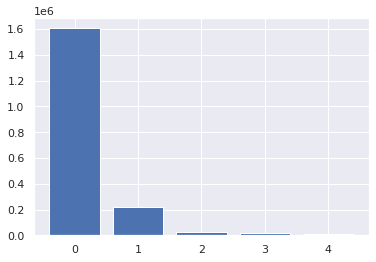

In [ ]:
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Since 85% of our data represents fires under 10 Acres, let's use SMOTE to balance out our classes.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Class=0, n=1606295 (20.000%)
Class=4, n=1606295 (20.000%)
Class=1, n=1606295 (20.000%)
Class=2, n=1606295 (20.000%)
Class=3, n=1606295 (20.000%)


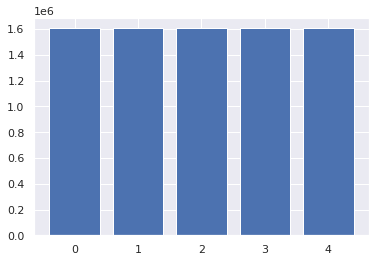

In [ ]:
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

##Third Model
###New Prediction Model With Balanced Classes

###Recreate my training and testing datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=150)

###Decision Tree Classifier

In [ ]:
clf = DecisionTreeClassifier(random_state=100)
model = clf.fit(X_train, y_train)
yhat = model.predict(X_test)
pd.DataFrame(y_test, yhat)
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

0.9987661044974486
0.8558895147135666


In [ ]:
print(f"{np.sum(y_test == yhat)} / {len(y_test)} correct")
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

2062217 / 2409443 correct
[[368239  82580  16523   8114   6595]
 [ 76473 361995  25128  11028   6500]
 [ 13548  21573 426528  12826   7840]
 [  6148   8530  11422 447315   8521]
 [  4594   4619   6717   7947 458140]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77    482051
           1       0.76      0.75      0.75    481124
           2       0.88      0.88      0.88    482315
           3       0.92      0.93      0.92    481936
           4       0.94      0.95      0.94    482017

    accuracy                           0.86   2409443
   macro avg       0.86      0.86      0.86   2409443
weighted avg       0.86      0.86      0.86   2409443



###Random Forest Classifier

In [ ]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
y_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_test,y_test))
print(clf_rf.score(X_test,y_test))

0.9031427595506514
0.9031427595506514


In [ ]:

print(f"{np.sum(y_test == y_pred)} / {len(y_test)} correct")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


2176818 / 2409443 correct
[[396547  63754  11044   5590   5116]
 [ 52552 396337  18238   8485   5512]
 [  6270  11562 449148   9392   5943]
 [  2241   3283   6604 463854   5954]
 [  1603   1249   3155   5078 470932]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84    482051
           1       0.83      0.82      0.83    481124
           2       0.92      0.93      0.93    482315
           3       0.94      0.96      0.95    481936
           4       0.95      0.98      0.97    482017

    accuracy                           0.90   2409443
   macro avg       0.90      0.90      0.90   2409443
weighted avg       0.90      0.90      0.90   2409443



###KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"{np.sum(y_test == y_pred)} / {len(y_test)} correct")

2019669 / 2409443 correct


###Logistic Regression

In [ ]:
sm.OLS(y.astype(float),X.astype(float)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.710
Model:                            OLS   Adj. R-squared (uncentered):              0.710
Method:                 Least Squares   F-statistic:                          3.282e+06
Date:                Tue, 27 Apr 2021   Prob (F-statistic):                        0.00
Time:                        21:33:38   Log-Likelihood:                     -1.3616e+07
No. Observations:             8031475   AIC:                                  2.723e+07
Df Residuals:                 8031469   BIC:                                  2.723e+07
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0004   1.78e-06   -233.453      0.000      -0.000      -0.000
x2             0.0082   2.97e-05    276.626      0.000       0.008       0.008
x3            -0.0056   8.01e-05    -69.403      0.000      -0.006      -0.005
x4            -0.0303   3.56e-05   -851.175      0.000      -0.030      -0.030
x5            -0.0241      0.000   -189.445      0.000      -0.024      -0.024
x6            -0.0114      0.000    -80.957      0.000      -0.012      -0.011
==============================================================================
Omnibus:                   834060.643   Durbin-Watson:                   0.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           262912.653
Skew:                          -0.150   Prob(JB):                         0.00
Kurtosis:                       2.166   Cond. No.                         614.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The logistic regression is better than our benchmark which is a good indicator of performance for our model. We can also note that the precision and recall scores are very close in range and there is a good model accuracy. I would suggest using this to help suppress wildfires more efficiently.